# CNNs

In this notebook you will learn how to build Convolutional Neural Networks (CNNs) for image processing.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/tf2_course/blob/master/05_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Imports

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

2023-05-14 00:36:30.894036: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) 
[GCC 9.4.0]
matplotlib 3.5.3
numpy 1.21.6
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.9.0
keras.api._v2.keras 2.9.0


In [4]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 1 – Simple CNN

### 1.1)
Load CIFAR10 using `keras.datasets.cifar10.load_data()`, and split it into a training set (45,000 images), a validation set (5,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1. Visualize a few images using `plt.imshow()`.

In [5]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

### 1.2)
Build and train a baseline model with a few dense layers, and plot the learning curves. Use the model's `summary()` method to count the number of parameters in this model.

**Tip**:

* Recall that to plot the learning curves, you can simply create a Pandas `DataFrame` with the `history.history` dict, then call its `plot()` method.

### 1.3)
Build and train a Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense. Before you print the `summary()`, try to manually calculate the number of parameters in your model's architecture, as well as the shape of the inputs and outputs of each layer. Next, plot the learning curves and compare the performance with the previous model.

### 1.4)
Looking at the learning curves, you can see that the model is overfitting. Add a Batch Normalization layer after each convolutional layer. Compare the model's performance and learning curves with the previous model.

**Tip**: there is no need for an activation function just before the pooling layers.

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 1 – Solution

### 1.1)
Load CIFAR10 using `keras.datasets.cifar10.load_data()`, and split it into a training set (45,000 images), a validation set (5,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1. Visualize a few images using `plt.imshow()`.

In [6]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train_full[:-5000] / 255
y_train = y_train_full[:-5000]
X_valid = X_train_full[-5000:] / 255
y_valid = y_train_full[-5000:]
X_test = X_test / 255

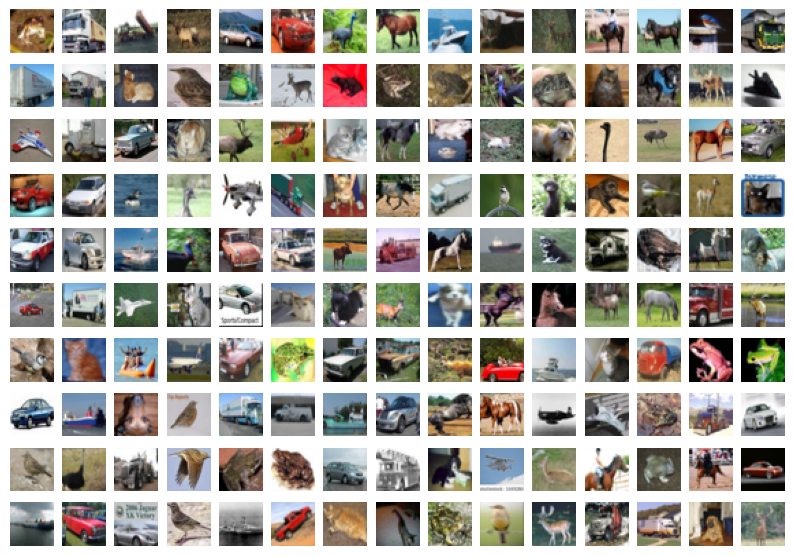

In [8]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

Let's print the classes of the images in the first row:

In [9]:
for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog truck truck deer automobile automobile bird horse ship cat deer horse horse bird truck 

### 1.2)
Build and train a baseline model with a few dense layers, and plot the learning curves. Use the model's `summary()` method to count the number of parameters in this model.

**Tip**:

* Recall that to plot the learning curves, you can simply create a Pandas `DataFrame` with the `history.history` dict, then call its `plot()` method.

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

2023-05-14 00:37:03.910285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 00:37:08.310641: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20661 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9
2023-05-14 00:37:08.314827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 20661 MB memory:  -> device: 1, name: NVIDIA L4, pci bus id: 0000:00:04.0, compute capability: 8.9
2023-05-14 00:37:08.318125: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:G

Epoch 1/20
  69/1407 [>.............................] - ETA: 2s - loss: 2.3364 - accuracy: 0.1721

2023-05-14 00:37:11.273531: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1407/1407 [==============================] - 5s 3ms/step - loss: 1.9084 - accuracy: 0.3127 - val_loss: 2.0495 - val_accuracy: 0.2842
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7241 - accuracy: 0.3838 - val_loss: 1.7197 - val_accuracy: 0.3872
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6460 - accuracy: 0.4139 - val_loss: 1.6924 - val_accuracy: 0.4018
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.5953 - accuracy: 0.4298 - val_loss: 1.9607 - val_accuracy: 0.3154
Epoch 5/20
1407/1407 [==============================] - 4s 2ms/step - loss: 1.5530 - accuracy: 0.4481 - val_loss: 1.5788 - val_accuracy: 0.4306
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.5178 - accuracy: 0.4577 - val_loss: 1.5523 - val_accuracy: 0.4510
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.4906 - accuracy: 0.4678 - val_loss: 1.5839 - val_accuracy: 0.4308
Epo

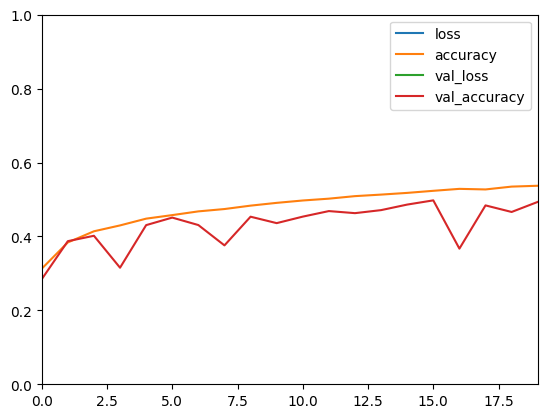

In [11]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


### 1.3)
Build and train a Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense. Before you print the `summary()`, try to manually calculate the number of parameters in your model's architecture, as well as the shape of the inputs and outputs of each layer. Next, plot the learning curves and compare the performance with the previous model.

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


2023-05-14 00:38:25.096699: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2023-05-14 00:38:26.258911: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-05-14 00:38:26.258947: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-05-14 00:38:26.259023: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1407/1407 [==============================] - 9s 4ms/step - loss: 1.9941 - accuracy: 0.2783 - val_loss: 1.7559 - val_accuracy: 0.3664
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6021 - accuracy: 0.4303 - val_loss: 1.6322 - val_accuracy: 0.4154
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3970 - accuracy: 0.5006 - val_loss: 1.4447 - val_accuracy: 0.4904
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2606 - accuracy: 0.5523 - val_loss: 1.2292 - val_accuracy: 0.5620
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1449 - accuracy: 0.5938 - val_loss: 1.2387 - val_accuracy: 0.5544
Epoch 6/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0470 - accuracy: 0.6283 - val_loss: 1.5319 - val_accuracy: 0.4896
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9640 - accuracy: 0.6607 - val_loss: 1.0294 - val_accuracy: 0.6366
Epo

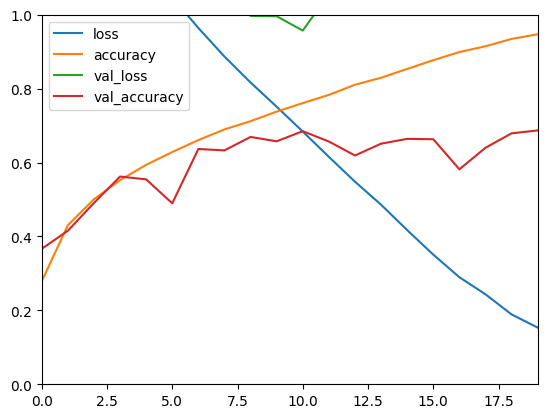

In [14]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [15]:
# Number of params in a convolutional layer =
# (kernel_width * kernel_height * channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1)  * 32  # in: 32x32x3   out: 32x32x32  Conv2D
  + (3 * 3 * 32 + 1) * 32  # in: 32x32x32  out: 32x32x32  Conv2D
  + 0                      # in: 32x32x32  out: 16x16x32  MaxPool2D
  + (3 * 3 * 32 + 1) * 64  # in: 16x16x32  out: 16x16x64  Conv2D
  + (3 * 3 * 64 + 1) * 64  # in: 16x16x64  out: 16x16x64  Conv2D
  + 0                      # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                      # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128       # in: 4096      out: 128       Dense
  + (128 + 1) * 10         # in: 128       out: 10        Dense
)

591274

Let's check:

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

### 1.4)
Looking at the learning curves, you can see that the model is overfitting. Add a Batch Normalization layer after each convolutional layer. Compare the model's performance and learning curves with the previous model.

**Tip**: there is no need for an activation function just before the pooling layers.

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3491 - accuracy: 0.5177 - val_loss: 1.5776 - val_accuracy: 0.4630
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9351 - accuracy: 0.6667 - val_loss: 0.9592 - val_accuracy: 0.6622
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7611 - accuracy: 0.7304 - val_loss: 0.9577 - val_accuracy: 0.6700
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6352 - accuracy: 0.7759 - val_loss: 0.9071 - val_accuracy: 0.6952
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5308 - accuracy: 0.8150 - val_loss: 0.8823 - val_accuracy: 0.7116
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4388 - accuracy: 0.8487 - val_loss: 1.0170 - val_accuracy: 0.6812
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3566 - accuracy: 0.8764 - val_loss: 0.8396 - val_accuracy:

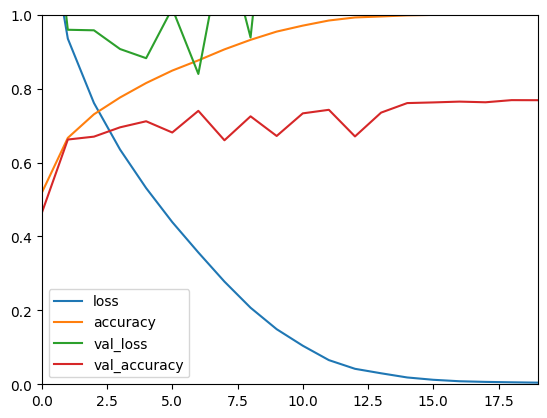

In [18]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 2 – Separable Convolutions

### 2.1)
Replace the `Conv2D` layers with `SeparableConv2D` layers (except the first one), fit your model and compare its performance and learning curves with the previous model.

### 2.2)
Try to estimate the number of parameters in your network, then check your result with `model.summary()`.

**Tip**: the batch normalization layer adds two parameters for each feature map (the scale and bias).

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 2 – Solution

### 2.1)
Replace the `Conv2D` layers with `SeparableConv2D` layers (except the first one), fit your model and compare its performance and learning curves with the previous model.

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3750 - accuracy: 0.5091 - val_loss: 1.0873 - val_accuracy: 0.6172
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9622 - accuracy: 0.6614 - val_loss: 0.9559 - val_accuracy: 0.6670
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8046 - accuracy: 0.7171 - val_loss: 0.9024 - val_accuracy: 0.6896
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6959 - accuracy: 0.7567 - val_loss: 1.0086 - val_accuracy: 0.6688
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6057 - accuracy: 0.7881 - val_loss: 0.8602 - val_accuracy: 0.7140
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5272 - accuracy: 0.8155 - val_loss: 0.8499 - val_accuracy: 0.7122
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4495 - accuracy: 0.8430 - val_loss: 0.8414 - val_accuracy:

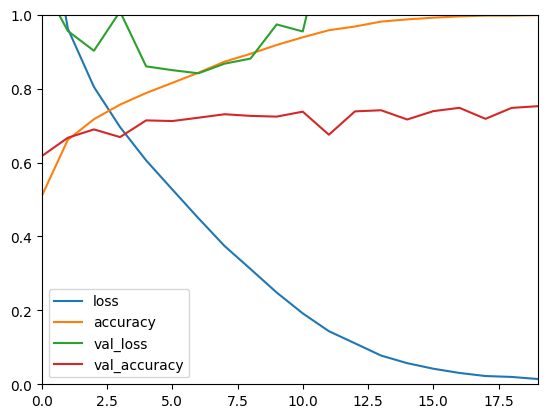

In [20]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

### 2.2)
Try to estimate the number of parameters in your network, then check your result with `model.summary()`.

**Tip**: the batch normalization layer adds two parameters for each feature map (the scale and bias).

In [21]:
# Number of params in a depthwise separable 2D convolution layer =
# kernel_width * kernel_height * channels_in + (channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1) * 32        # in: 32x32x3   out: 32x32x32  Conv2D
  + 32 * 2                      # in: 32x32x32  out: 32x32x32  BN
  + 3 * 3 * 32 + (32 + 1) * 32  # in: 32x32x32  out: 32x32x32  SeparableConv2D
  + 32 * 2                      # in: 32x32x32  out: 32x32x32  BN
  + 0                           # in: 32x32x32  out: 16x16x32  MaxPool2D
  + 3 * 3 * 32 + (32 + 1) * 64  # in: 16x16x32  out: 16x16x64  SeparableConv2D
  + 64 * 2                      # in: 16x16x64  out: 16x16x64  BN
  + 3 * 3 * 64 + (64 + 1) * 64  # in: 16x16x64  out: 16x16x64  SeparableConv2D
  + 64 * 2                      # in: 16x16x64  out: 16x16x64  BN
  + 0                           # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                           # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128            # in: 4096      out: 128       Dense
  + (128 + 1) * 10              # in: 128       out: 10        Dense
)

535466

Let's check:

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 separable_conv2d (Separable  (None, 32, 32, 32)       1344      
 Conv2D)                                                         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 3 – Pretrained CNNs

### 3.1)
Using `tf.keras.utils.get_file()`, download the image `fig.jpg` from https://github.com/ageron/tf2_course/raw/master/images/fig.jpg, then load it using `keras.preprocessing.image.load_img()` followed by `keras.preprocessing.image.img_to_array()`. You also load the `ostrich.jpg` image if you want, from the same folder. You should set `target_size=(299, 299)` when calling `load_img()`, as this is the shape that the Xception network expects.

### 3.2)
Create a batch containing the image(s) you just loaded, and preprocess this batch using `keras.applications.xception.preprocess_input()`. Verify that the features now vary from -1 to 1: this is what the Xception network expects.

### 3.3)
Create an instance of the Xception model (`keras.applications.xception.Xception`) and use its `predict()` method to classify the images in the batch. You can use `keras.applications.resnet50.decode_predictions()` to convert the output matrix into a list of top-N predictions (with their corresponding class labels).

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 3 – Solution

### 3.1)
Using `keras.preprocessing.image.load_img()` followed by `keras.preprocessing.image.img_to_array()`, load one or more images (e.g., `fig.jpg` or `ostrich.jpg` in the `images` folder). You should set `target_size=(299, 299)` when calling `load_img()`, as this is the shape that the Xception network expects.

In [23]:
img_fig_path = keras.utils.get_file(
    "fig.jpg",
    "https://github.com/ageron/tf2_course/raw/master/images/fig.jpg")
img_fig = keras.preprocessing.image.load_img(img_fig_path, target_size=(299, 299))
img_fig = keras.preprocessing.image.img_to_array(img_fig)

Exception: URL fetch failure on https://github.com/ageron/tf2_course/raw/master/images/fig.jpg: 404 -- Not Found

In [ ]:
plt.imshow(img_fig / 255)
plt.axis("off")
plt.show()
img_fig.shape

In [ ]:
img_ostrich_path = keras.utils.get_file(
    "ostrich.jpg",
    "https://github.com/ageron/tf2_course/raw/master/images/ostrich.jpg")
img_ostrich = keras.preprocessing.image.load_img(img_ostrich_path, target_size=(299, 299))
img_ostrich = keras.preprocessing.image.img_to_array(img_ostrich)

In [ ]:
plt.imshow(img_ostrich / 255)
plt.axis("off")
plt.show()
img_ostrich.shape

### 3.2)
Create a batch containing the image(s) you just loaded, and preprocess this batch using `keras.applications.xception.preprocess_input()`. Verify that the features now vary from -1 to 1: this is what the Xception network expects.

In [ ]:
X_batch = np.array([img_fig, img_ostrich])
X_preproc = keras.applications.xception.preprocess_input(X_batch)

In [ ]:
X_preproc.min(), X_preproc.max()

### 3.3)
Create an instance of the Xception model (`keras.applications.xception.Xception`) and use its `predict()` method to classify the images in the batch. You can use `keras.applications.resnet50.decode_predictions()` to convert the output matrix into a list of top-N predictions (with their corresponding class labels).

In [ ]:
model = keras.applications.xception.Xception()
Y_proba = model.predict(X_preproc)

In [ ]:
Y_proba.shape

In [ ]:
np.argmax(Y_proba, axis=1)

In [ ]:
decoded_predictions = keras.applications.resnet50.decode_predictions(Y_proba)
for preds in decoded_predictions:
    for wordnet_id, name, proba in preds:
        print("{} ({}): {:.1f}%".format(name, wordnet_id, 100 * proba))
    print()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Exercise 4 – Data Augmentation and Transfer Learning
In this exercise you will reuse a pretrained Xception model to build a flower classifier.

First, let's download the dataset:

In [24]:
import tensorflow as tf
from tensorflow import keras
import os

flowers_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
flowers_path = keras.utils.get_file("flowers.tgz", flowers_url, extract=True)
flowers_dir = os.path.join(os.path.dirname(flowers_path), "flower_photos")

In [25]:
for root, subdirs, files in os.walk(flowers_dir):
    print(root)
    for filename in files[:3]:
        print("   ", filename)
    if len(files) > 3:
        print("    ...")

/home/mike/.keras/datasets/flower_photos
    LICENSE.txt
/home/mike/.keras/datasets/flower_photos/tulips
    7166644048_b00a14f01b.jpg
    14127532150_112823a8f6.jpg
    11614202956_1dcf1c96a1.jpg
    ...
/home/mike/.keras/datasets/flower_photos/sunflowers
    5015462205_440898fe41_n.jpg
    14955545254_324cd4ee75.jpg
    5973935729_2868f2db1f_n.jpg
    ...
/home/mike/.keras/datasets/flower_photos/roses
    3624546109_8eb98f0cdb.jpg
    3550491463_3eb092054c_m.jpg
    7211616670_2d49ecb3a5_m.jpg
    ...
/home/mike/.keras/datasets/flower_photos/daisy
    302782756_d35cb3e468.jpg
    15760811380_4d686c892b_n.jpg
    23095658544_7226386954_n.jpg
    ...
/home/mike/.keras/datasets/flower_photos/dandelion
    2503875867_2075a9225d_m.jpg
    2780702427_312333ef33.jpg
    14313509432_6f2343d6c8_m.jpg
    ...


### 4.1)
Build a `keras.preprocessing.image.ImageDataGenerator` that will preprocess the images and do some data augmentation (the [documentation](https://keras.io/preprocessing/image/) contains useful examples):

* It should at least perform horizontal flips and keep 10% of the data for validation, but you may also make it perform a bit of rotation, rescaling, etc.
* Also make sure to apply the Xception preprocessing function (using the `preprocessing_function` argument).
* Call this generator's `flow_from_directory()` method to get an iterator that will load and preprocess the flower photos from the `flower_photos` directory, setting the target size to (299, 299) and `subset` to `"training"`.
* Call this method again with the same parameters except `subset="validation"` to get a second iterator for validation.
* Get the next batch from the validation iterator and display the first image from the batch.

### 4.2)
Now let's build the model:
* Create a new `Xception` model, but this time set `include_top=False` to get the model without the top layer. **Tip**: you will need to access its `input` and `output` properties.
* Make all its layers non-trainable.
* Using the functional API, add a `GlobalAveragePooling2D` layer (feeding it the Xception model's output), and add a `Dense` layer with 5 neurons and the Softmax activation function.
* Compile the model. **Tip**: don't forget to add the `"accuracy"` metric.
* Fit your model using `fit_generator()`, passing it the training and validation iterators (and setting `steps_per_epoch` and `validation_steps` appropriately).

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)

## Exercise 4 – Solution

### 4.1)
Build a `keras.preprocessing.image.ImageDataGenerator` that will preprocess the images and do some data augmentation (the [documentation](https://keras.io/preprocessing/image/) contains useful examples):

* It should at least perform horizontal flips and keep 10% of the data for validation, but you may also make it perform a bit of rotation, rescaling, etc.
* Also make sure to apply the Xception preprocessing function (using the `preprocessing_function` argument).
* Call this generator's `flow_from_directory()` method to get an iterator that will load and preprocess the flower photos from the `flower_photos` directory, setting the target size to (299, 299) and `subset` to `"training"`.
* Call this method again with the same parameters except `subset="validation"` to get a second iterator for validation.
* Get the next batch from the validation iterator and display the first image from the batch.

In [26]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1,
    preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="training")

valid_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="validation")

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


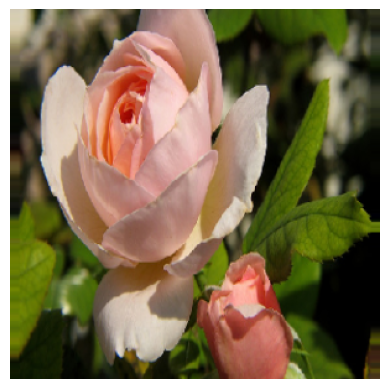

In [27]:
X_batch, y_batch = next(valid_generator)
plt.imshow((X_batch[0] + 1)/2)
plt.axis("off")
plt.show()

### 4.2)
Now let's build the model:
* Create a new `Xception` model, but this time set `include_top=False` to get the model without the top layer. **Tip**: you will need to access its `input` and `output` properties.
* Make all its layers non-trainable.
* Using the functional API, add a `GlobalAveragePooling2D` layer (feeding it the Xception model's output), and add a `Dense` layer with 5 neurons and the Softmax activation function.
* Compile the model. **Tip**: don't forget to add the `"accuracy"` metric.
* Fit your model using `fit_generator()`, passing it the training and validation iterators (and setting `steps_per_epoch` and `validation_steps` appropriately).

In [28]:
n_classes = 5

base_model = keras.applications.xception.Xception(include_top=False)

for layer in base_model.layers:
    layer.trainable = False

global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)
predictions = keras.layers.Dense(n_classes, activation='softmax')(global_pool)

model = keras.models.Model(base_model.input, predictions)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [29]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=3306 // 32,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=364 // 32)

/home/mike/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
103/103 [==============================] - 71s 650ms/step - loss: 1.5904 - accuracy: 0.2749 - val_loss: 1.5128 - val_accuracy: 0.3523
Epoch 2/50
103/103 [==============================] - 66s 643ms/step - loss: 1.4304 - accuracy: 0.4713 - val_loss: 1.3870 - val_accuracy: 0.5398
Epoch 3/50
103/103 [==============================] - 66s 643ms/step - loss: 1.3132 - accuracy: 0.6225 - val_loss: 1.2853 - val_accuracy: 0.6222
Epoch 4/50
103/103 [==============================] - 66s 640ms/step - loss: 1.2171 - accuracy: 0.6927 - val_loss: 1.2009 - val_accuracy: 0.6619
Epoch 5/50
103/103 [==============================] - 66s 643ms/step - loss: 1.1343 - accuracy: 0.7230 - val_loss: 1.1416 - val_accuracy: 0.7017
Epoch 6/50
103/103 [==============================] - 66s 642ms/step - loss: 1.0656 - accuracy: 0.7425 - val_loss: 1.0803 - val_accuracy: 0.7159
Epoch 7/50
103/103 [==============================] - 66s 640ms/step - loss: 1.0042 - accuracy: 0.7657 - val_loss: 1.0260 - val_ac

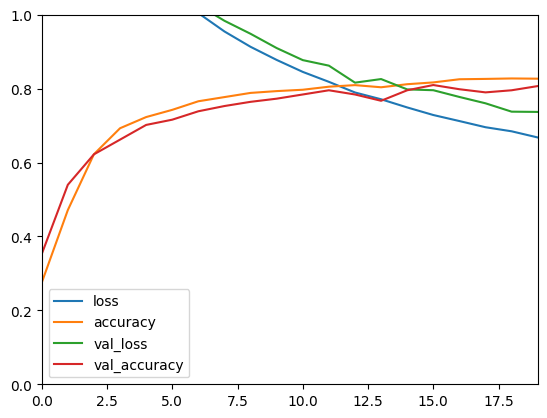

In [30]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

## Object Detection Project

The Google [Street View House Numbers](http://ufldl.stanford.edu/housenumbers/) (SVHN) dataset contains pictures of digits in all shapes and colors, taken by the Google Street View cars. The goal is to classify and locate all the digits in large images.
* Train a Fully Convolutional Network on the 32x32 images.
* Use this FCN to build a digit detector in the large images.